# Title of the analysis:

# *Analytical description of IMDB's (Internet Movie Database) movie reviews that includes an illustrative mapping of the most frequently occuring words and expressions in the whole of the reviews, visual representation of the quantity of 'Positive' and 'Negative' reviews and of the frequency of all review-lengths followed by the computation of a machine learning model classifying unseen movie reviews as 'Positive' or 'Negative'.*

# Description of the dataset's columns:

Can be found on this link: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

# Index of the analysis:

<ins> 1. Data Preprocessing </ins>

- 1.a) Text Cleaning

- 1.b) Tokenization

- 1.c) Padding and Truncation

- 1.d) Preparing Inputs

<ins> 2. Exploratory Data Analysis </ins>

- 2.a) Histogram & Pie Chart for the study of positive and negative reviews' frequency

- 2.b) Word Cloud & Ngram Bar Charts for the study of expressions' frequency in positive and negative reviews

- 2.c) Column and Line Charts for the study of character-count in positive and negative reviews

- 2.d) Column and Line Charts for the study of word-count in positive and negative reviews

<ins> 3. Machine Learning Model classifying reviews as per their sentiment </ins>

- 3.a) Loading of the Pretrained BERT Model 

- 3.b) Spliting Data into Training and Validation Sets

- 3.c) Creating DataLoaders for Training and Validation Sets

- 3.d) Fine-tuning of the BERT Model

- 3.e) Evaluation and Inference of the BERT Model

# 1. Data Preprocessing:

## <ins>1.a) Text Cleaning:</ins>

The Text Cleaning section of our analysis will carry out the following actions (all necessary to complete our proposed Exploratory Data Analysis and Machine Learning):

- removing any HTML tags or special characters from the reviews
- turning all upper cases on the reviews into lower cases
- removing punctuation marks from the reviews
- removing stopwords (common words which do not carry any meaning for sentiment analysis like "the", "is" or "in") from the reviews

In [32]:
import pandas as pd

file_path = '/Users/goncalolazaro/Downloads/IMDB Dataset.csv.zip'

pd.set_option('display.max_columns', None)

df = pd.read_csv(file_path)

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [33]:
# Removing any HTML tags of special characters from the reviews, turning all upper cases on the reviews into lower cases & removing punctuation marks from the reviews

import re
import string

# Function to clean the text (1st version)
def clean_text(text):
    # Remove HTML tags
    cleaned_text = re.sub('<.*?>', '', text)
    # Remove special characters
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', cleaned_text)
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    return cleaned_text
    # Remove punctuation marks
    cleaned_text = cleaned_text.translate(str.maketrans('', '', string.punctuation))

# Apply the clean_text function to the 'review' column
df['review'] = df['review'].apply(clean_text)

# Display the cleaned DataFrame
print(df)

                                                  review sentiment
0      one of the other reviewers has mentioned that ...  positive
1      a wonderful little production the filming tech...  positive
2      i thought this was a wonderful way to spend ti...  positive
3      basically theres a family where a little boy j...  negative
4      petter matteis love in the time of money is a ...  positive
...                                                  ...       ...
49995  i thought this movie did a down right good job...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  i am a catholic taught in parochial elementary...  negative
49998  im going to have to disagree with the previous...  negative
49999  no one expects the star trek movies to be high...  negative

[50000 rows x 2 columns]


In [34]:
# Removing stopwords (common words which do not carry any meaning for sentiment analysis like "the", "is" or "in") from the reviews

import nltk
from nltk.corpus import stopwords

# Load stopwords
stop_words = set(stopwords.words('english'))

# Function to clean the text (2nd version)
def clean_text_2(text):
    # Remove stopwords
    cleaned_text = ' '.join(word for word in text.split() if word not in stop_words)
    return cleaned_text

# Apply the clean_text function to the 'review' column
df['review'] = df['review'].apply(clean_text_2)

# Display the cleaned DataFrame
print(df)

                                                  review sentiment
0      one reviewers mentioned watching oz episode yo...  positive
1      wonderful little production filming technique ...  positive
2      thought wonderful way spend time hot summer we...  positive
3      basically theres family little boy jake thinks...  negative
4      petter matteis love time money visually stunni...  positive
...                                                  ...       ...
49995  thought movie right good job wasnt creative or...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  catholic taught parochial elementary schools n...  negative
49998  im going disagree previous comment side maltin...  negative
49999  one expects star trek movies high art fans exp...  negative

[50000 rows x 2 columns]


## <ins>1.b) Tokenization:</ins>

The Tokenization section of our analysis will break down each and every review into individual words of subwords that we'll call tokens (again, necessary to complete our proposed Exploratory Data Analysis and Machine Learning):

In [35]:
from nltk.tokenize import word_tokenize

# Tokenize the reviews
df['tokenized_review'] = df['review'].apply(word_tokenize)

# Display the DataFrame with tokenized reviews
print(df)

                                                  review sentiment  \
0      one reviewers mentioned watching oz episode yo...  positive   
1      wonderful little production filming technique ...  positive   
2      thought wonderful way spend time hot summer we...  positive   
3      basically theres family little boy jake thinks...  negative   
4      petter matteis love time money visually stunni...  positive   
...                                                  ...       ...   
49995  thought movie right good job wasnt creative or...  positive   
49996  bad plot bad dialogue bad acting idiotic direc...  negative   
49997  catholic taught parochial elementary schools n...  negative   
49998  im going disagree previous comment side maltin...  negative   
49999  one expects star trek movies high art fans exp...  negative   

                                        tokenized_review  
0      [one, reviewers, mentioned, watching, oz, epis...  
1      [wonderful, little, production, fi

## <ins>1.c) Padding and Truncation:</ins>

The Padding and Truncation section of our analysis will assure the input sequences fed into our Machine Learning model (which in the current case are the afore-cited tokens) have a fixed length, which is a necessary condition for it to run correctly:

In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define maximum sequence length
max_seq_length = 10

# Filter out non-integer values from tokenized sequences
df['tokenized_review'] = df['tokenized_review'].apply(lambda x: [int(word) for word in x if str(word).isdigit()])

# Pad or truncate sequences to max_seq_length
df['padded_review'] = pad_sequences(df['tokenized_review'], maxlen=max_seq_length, padding='post', truncating='post').tolist()

# Display the DataFrame with padded reviews
print(df)

                                                  review sentiment  \
0      one reviewers mentioned watching oz episode yo...  positive   
1      wonderful little production filming technique ...  positive   
2      thought wonderful way spend time hot summer we...  positive   
3      basically theres family little boy jake thinks...  negative   
4      petter matteis love time money visually stunni...  positive   
...                                                  ...       ...   
49995  thought movie right good job wasnt creative or...  positive   
49996  bad plot bad dialogue bad acting idiotic direc...  negative   
49997  catholic taught parochial elementary schools n...  negative   
49998  im going disagree previous comment side maltin...  negative   
49999  one expects star trek movies high art fans exp...  negative   

      tokenized_review                   padded_review  
0                   []  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
1                   []  [0, 0, 0, 0, 0, 0, 0,

## <ins>1.d) Preparing Inputs:</ins>

The Preparing Inputs section of our analysis will carry out the following actions (all necessary to complete our proposed Machine Learning model):

- attributing unique IDs to each and every token generated, which allows for precise token-level representation within the input sequence, hence aiding comprehensive contextual processing by the model
- attributing distinct segment IDs to each and every segment delineated by the tokens, which enables the differentiation between the various segments within the input sequence, hence facilitating accurate contextual understanding and analysis
- creating "atention masks" which guide our model by specifying which tokens should be attended to and which ones should be disregarded, hence enhancing the model's ability to focus on relevant information during processing
- attributing distinct token type IDs to each segment delineated by the tokens, which enables our model to differentiate between the various segments within the input sequence, hence facilitating accurate contextual understanding and analysis
- generating labels for each review, associating those with their respective sentiment categories (positive, negative or other) which is crucial for training our machine learning model to then predict sentiment

In [37]:
# Preparing inputs for the machine learning model:
from transformers import BertTokenizer
import torch

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example sentences
sentences = ["This is the first sentence.", "This is the second sentence."]

# Initialize lists to store token_ids and labels for each sentence
all_token_ids = []
all_attention_masks = []
all_token_type_ids = []
all_labels = []

# Loop over each sentence and generate token_ids, attention_masks, token_type_ids, and labels
for sentence in sentences:
    # Tokenize input sentence
    encoded_inputs = tokenizer(sentence, return_tensors='pt', padding=True, truncation=True)
    token_ids = encoded_inputs['input_ids']
    attention_masks = encoded_inputs['attention_mask']
    
    # Calculate token type IDs based on the position of the [SEP] token
    sep_index = token_ids[0].tolist().index(tokenizer.sep_token_id)
    token_type_ids = torch.tensor([0] * (sep_index + 1) + [1] * (len(token_ids[0]) - (sep_index + 1)), dtype=torch.long)
    
    # Extract token IDs
    all_token_ids.append(token_ids)
    all_attention_masks.append(attention_masks)
    all_token_type_ids.append(token_type_ids)
    
    # Define labels for the current sentence (example labels for positive and negative sentiment)
    if "first" in sentence:
        labels = torch.tensor([1])  # Positive sentiment for the first sentence
    else:
        labels = torch.tensor([0])  # Negative sentiment for the second sentence
    all_labels.append(labels)

# Concatenate token_ids, attention_masks, token_type_ids, and labels
token_ids = torch.cat(all_token_ids, dim=0)
attention_masks = torch.cat(all_attention_masks, dim=0)
token_type_ids = torch.cat(all_token_type_ids, dim=0)
labels = torch.cat(all_labels, dim=0)

# Display the prepared inputs
print("Token IDs:", token_ids)
print("Segment IDs:", token_type_ids)
print("Attention Masks:", attention_masks)
print("Token Type IDs:", token_type_ids)
print("Labels shape:", labels.shape)

Token IDs: tensor([[ 101, 2023, 2003, 1996, 2034, 6251, 1012,  102],
        [ 101, 2023, 2003, 1996, 2117, 6251, 1012,  102]])
Segment IDs: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Attention Masks: tensor([[1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1]])
Token Type IDs: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Labels shape: torch.Size([2])


# 2. Exploratory Data Analysis:

## <ins>2.a) Histogram & Pie Chart for the study of positive and negative reviews' frequency:</ins>

The Histogram and Pie Chart provide us a view of how many reviews have their sentiment categorized as 'Positive', 'Negative' or any other, on top of showing what percentage of total reviews falls under each of those categories.

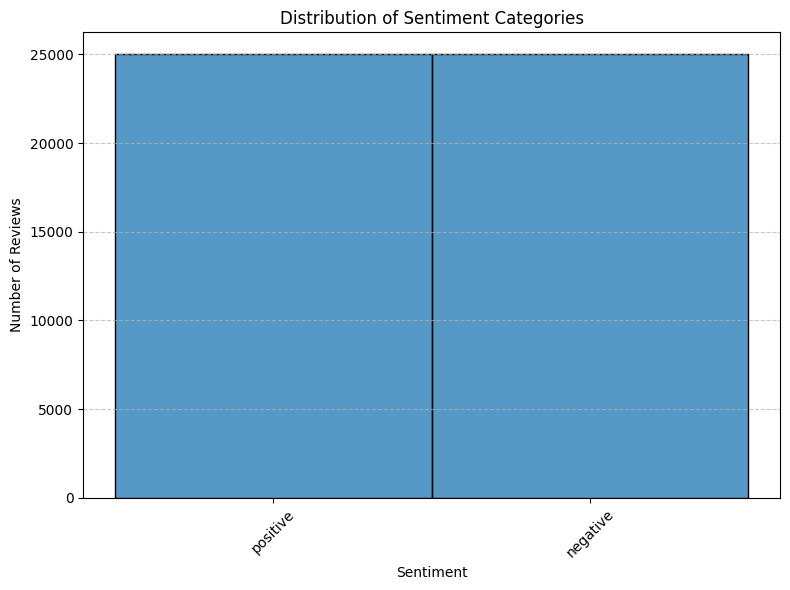

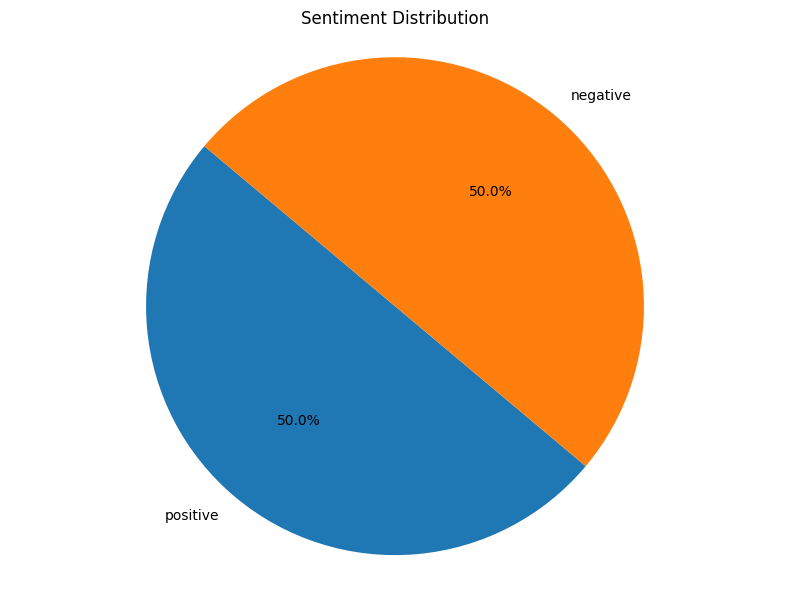

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of reviews for each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='sentiment', discrete=True)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

## Insights from 2.a) Histogram & Pie Chart:

- There is precisely the same amount of positive and negative reviews on the dataset and no other values - including empty values - in the "sentiment" column.

## <ins>2.b) Word Cloud & Ngram Bar Charts for the study of expressions' frequency in positive and negative reviews:</ins>

The Word Cloud illustrates the most used words in the whole of the reviews, with the words' sizes representing the frequency of their utilization on the dataset (the larger the size, the bigger the frequency of usage).

The Ngram Bar Charts indicate what the most commonly used expressions that include precisely 1, 2, 3 and 4 words are in the whole of the reviews.

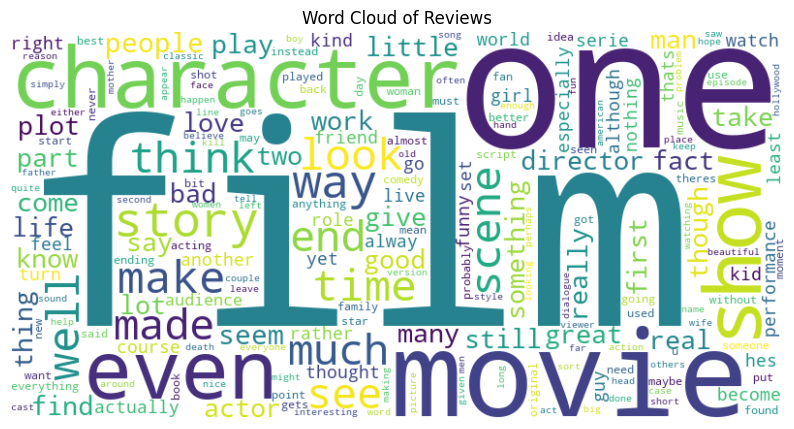

In [13]:
from wordcloud import WordCloud

# Combine all reviews into a single string
all_reviews = ' '.join(df['review'].dropna())

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')  # Hide axis
plt.show()

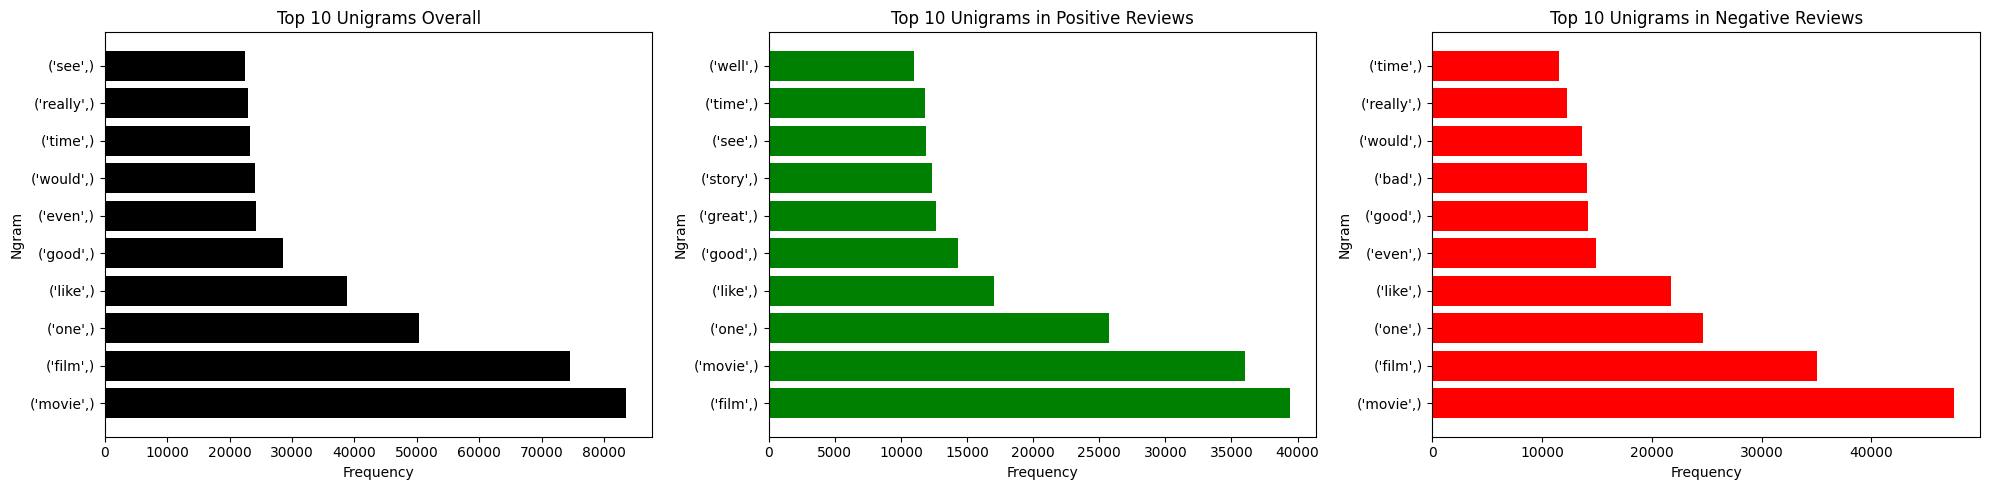

In [19]:
from nltk import ngrams
from collections import Counter

def tokenize_reviews(reviews):
    """Tokenize the reviews into words."""
    return reviews.split()

def generate_ngrams(words, n):
    """Generate ngrams from the tokenized words."""
    return list(ngrams(words, n))

def plot_horizontal_bar_chart(data, title, color):
    """Plot a horizontal bar chart."""
    bigrams = [str(item[0]) for item in data]  # Convert bigrams to strings
    counts = [item[1] for item in data]
    plt.barh(bigrams, counts, color=color)
    plt.xlabel('Frequency')
    plt.ylabel('Ngram')
    plt.title(title)

# Combine all reviews into a single string
all_reviews = ' '.join(df['review'].dropna())

# Tokenize the reviews into words
all_words = tokenize_reviews(all_reviews)

# Generate unigrams from the tokenized words (n=1)
all_unigrams = generate_ngrams(all_words, 1)

# Count the frequency of each unigram
all_unigram_counts = Counter(all_unigrams)

# Select the top 10 most common unigrams overall
top_10_unigrams_overall = all_unigram_counts.most_common(10)

# Separate positive and negative reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review'].dropna())
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['review'].dropna())

# Tokenize the positive and negative reviews into words
positive_words = tokenize_reviews(positive_reviews)
negative_words = tokenize_reviews(negative_reviews)

# Generate unigrams from the tokenized positive and negative words (n=1)
positive_unigrams = generate_ngrams(positive_words, 1)
negative_unigrams = generate_ngrams(negative_words, 1)

# Count the frequency of each unigram in positive and negative reviews
positive_unigram_counts = Counter(positive_unigrams)
negative_unigram_counts = Counter(negative_unigrams)

# Select the top 10 most common unigrams for positive and negative reviews
top_10_unigrams_positive = positive_unigram_counts.most_common(10)
top_10_unigrams_negative = negative_unigram_counts.most_common(10)

# Create subplots
plt.figure(figsize=(20, 5))

# Plot horizontal bar chart for overall reviews (color: black)
plt.subplot(1, 3, 1)
plot_horizontal_bar_chart(top_10_unigrams_overall, 'Top 10 Unigrams Overall', 'black')

# Plot horizontal bar chart for positive reviews (color: green)
plt.subplot(1, 3, 2)
plot_horizontal_bar_chart(top_10_unigrams_positive, 'Top 10 Unigrams in Positive Reviews', 'green')

# Plot horizontal bar chart for negative reviews (color: red)
plt.subplot(1, 3, 3)
plot_horizontal_bar_chart(top_10_unigrams_negative, 'Top 10 Unigrams in Negative Reviews', 'red')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

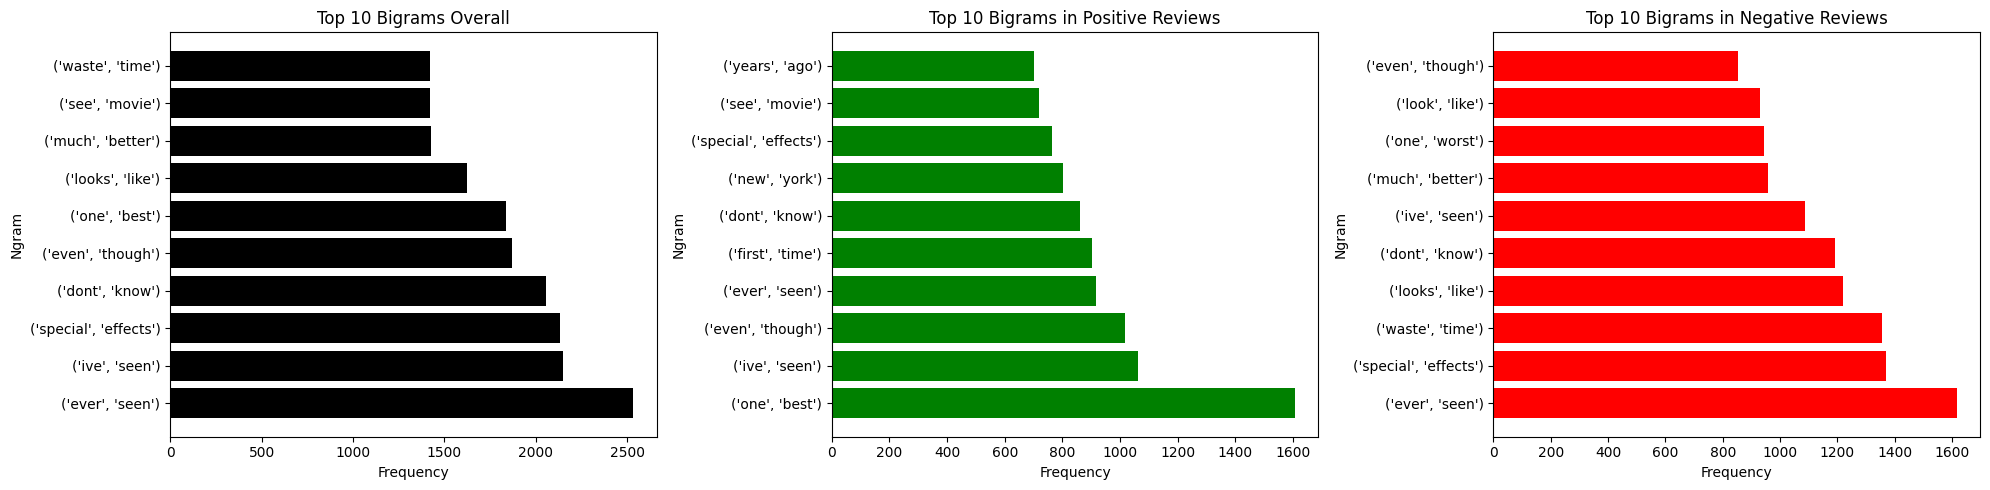

In [20]:
# Generate bigrams from the tokenized words (n=2)
all_bigrams = generate_ngrams(all_words, 2)

# Count the frequency of each bigram
all_bigram_counts = Counter(all_bigrams)

# Select the top 10 most common bigrams overall
top_10_bigrams_overall = all_bigram_counts.most_common(10)

# Generate bigrams from the tokenized positive and negative words (n=2)
positive_bigrams = generate_ngrams(positive_words, 2)
negative_bigrams = generate_ngrams(negative_words, 2)

# Count the frequency of each bigram in positive and negative reviews
positive_bigram_counts = Counter(positive_bigrams)
negative_bigram_counts = Counter(negative_bigrams)

# Select the top 10 most common bigrams for positive and negative reviews
top_10_bigrams_positive = positive_bigram_counts.most_common(10)
top_10_bigrams_negative = negative_bigram_counts.most_common(10)

# Plot horizontal bar charts for bigrams
plt.figure(figsize=(20, 5))

# Plot horizontal bar chart for overall bigrams (color: black)
plt.subplot(1, 3, 1)
plot_horizontal_bar_chart(top_10_bigrams_overall, 'Top 10 Bigrams Overall', 'black')

# Plot horizontal bar chart for positive bigrams (color: green)
plt.subplot(1, 3, 2)
plot_horizontal_bar_chart(top_10_bigrams_positive, 'Top 10 Bigrams in Positive Reviews', 'green')

# Plot horizontal bar chart for negative bigrams (color: red)
plt.subplot(1, 3, 3)
plot_horizontal_bar_chart(top_10_bigrams_negative, 'Top 10 Bigrams in Negative Reviews', 'red')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

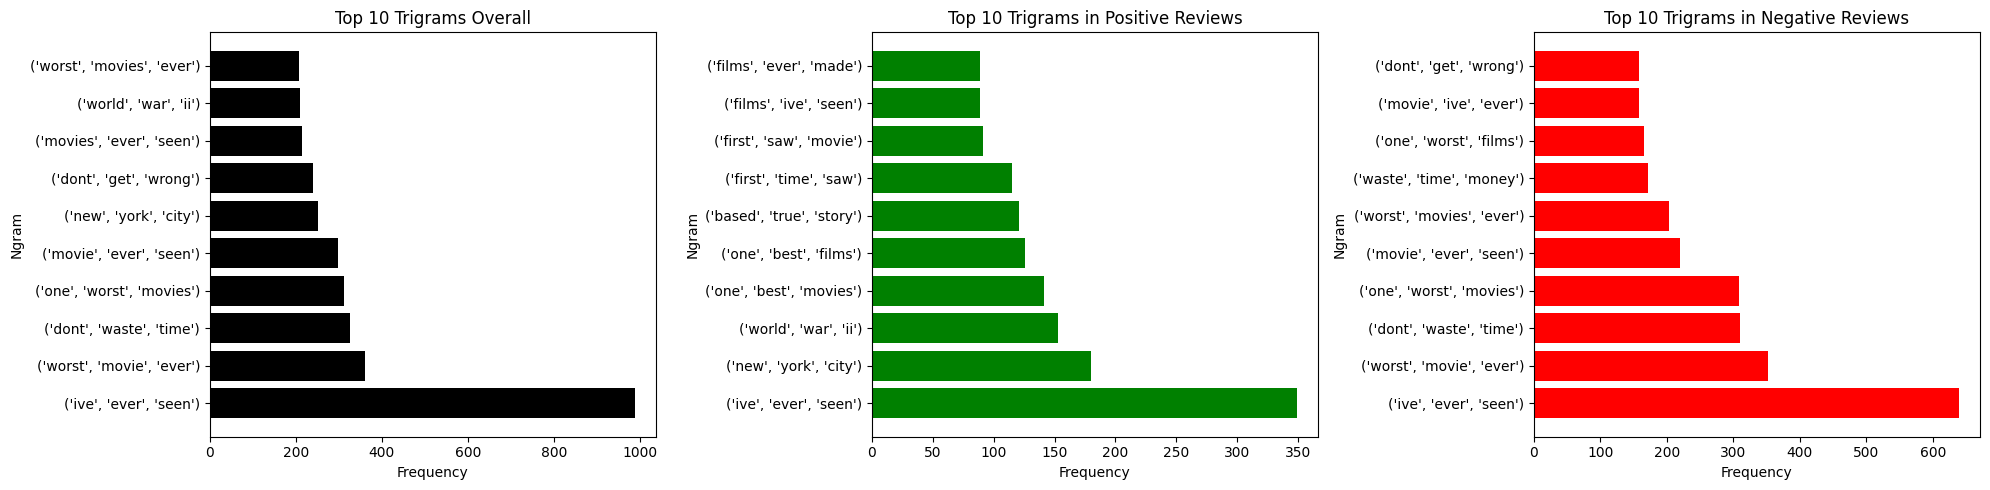

In [21]:
# Generate trigrams from the tokenized words (n=3)
all_trigrams = generate_ngrams(all_words, 3)

# Count the frequency of each trigram
all_trigram_counts = Counter(all_trigrams)

# Select the top 10 most common trigrams overall
top_10_trigrams_overall = all_trigram_counts.most_common(10)

# Generate trigrams from the tokenized positive and negative words (n=3)
positive_trigrams = generate_ngrams(positive_words, 3)
negative_trigrams = generate_ngrams(negative_words, 3)

# Count the frequency of each trigram in positive and negative reviews
positive_trigram_counts = Counter(positive_trigrams)
negative_trigram_counts = Counter(negative_trigrams)

# Select the top 10 most common trigrams for positive and negative reviews
top_10_trigrams_positive = positive_trigram_counts.most_common(10)
top_10_trigrams_negative = negative_trigram_counts.most_common(10)

# Plot horizontal bar charts for trigrams
plt.figure(figsize=(20, 5))

# Plot horizontal bar chart for overall trigrams (color: black)
plt.subplot(1, 3, 1)
plot_horizontal_bar_chart(top_10_trigrams_overall, 'Top 10 Trigrams Overall', 'black')

# Plot horizontal bar chart for positive trigrams (color: green)
plt.subplot(1, 3, 2)
plot_horizontal_bar_chart(top_10_trigrams_positive, 'Top 10 Trigrams in Positive Reviews', 'green')

# Plot horizontal bar chart for negative trigrams (color: red)
plt.subplot(1, 3, 3)
plot_horizontal_bar_chart(top_10_trigrams_negative, 'Top 10 Trigrams in Negative Reviews', 'red')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

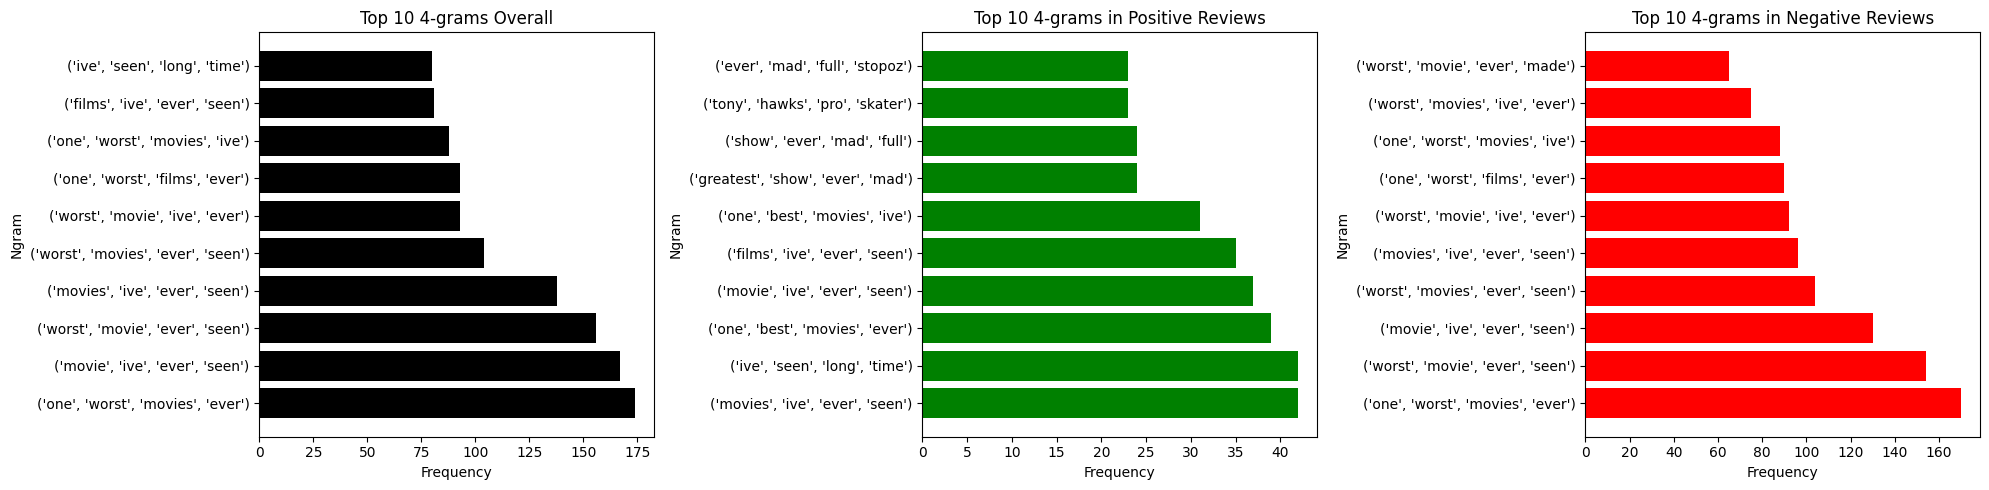

In [22]:
# Generate 4-grams from the tokenized words (n=4)
all_4grams = generate_ngrams(all_words, 4)

# Count the frequency of each 4-gram
all_4gram_counts = Counter(all_4grams)

# Select the top 10 most common 4-grams overall
top_10_4grams_overall = all_4gram_counts.most_common(10)

# Generate 4-grams from the tokenized positive and negative words (n=4)
positive_4grams = generate_ngrams(positive_words, 4)
negative_4grams = generate_ngrams(negative_words, 4)

# Count the frequency of each 4-gram in positive and negative reviews
positive_4gram_counts = Counter(positive_4grams)
negative_4gram_counts = Counter(negative_4grams)

# Select the top 10 most common 4-grams for positive and negative reviews
top_10_4grams_positive = positive_4gram_counts.most_common(10)
top_10_4grams_negative = negative_4gram_counts.most_common(10)

# Plot horizontal bar charts for 4-grams
plt.figure(figsize=(20, 5))

# Plot horizontal bar chart for overall 4-grams (color: black)
plt.subplot(1, 3, 1)
plot_horizontal_bar_chart(top_10_4grams_overall, 'Top 10 4-grams Overall', 'black')

# Plot horizontal bar chart for positive 4-grams (color: green)
plt.subplot(1, 3, 2)
plot_horizontal_bar_chart(top_10_4grams_positive, 'Top 10 4-grams in Positive Reviews', 'green')

# Plot horizontal bar chart for negative 4-grams (color: red)
plt.subplot(1, 3, 3)
plot_horizontal_bar_chart(top_10_4grams_negative, 'Top 10 4-grams in Negative Reviews', 'red')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Insights from 2.b) Word Cloud and the Ngram Bar Charts:

- The most commonly used expressions in the positive reviews attribute time-context to the movie-appreciation by verbalizing a movie's one of the best the reviewer's ever seen. 
- In parallel, the most commonly used expressions in the negative reviews attribute time-context to the movie-appreciation by verbalizing a movie's one of the worst the reviewer's ever seen. 
- The categorization of a movie being one of the worst the reviewer's ever seen is given more loosely than the very oppositve categorization of being one of the best, as shown by the higher preponderance of the former (vs the latter) on a dataset that holds precisely the same amount of positive and negative reivews.
- As far as movie-characteristics that were most featured on all reviews, we see "Performance", "Character", "World War II", "New York City" and "Special Effects".
- As far as movie-characteristics that were most featured on positive reviews, we see "World War II", "New York City", "Special Effects" and "Story".
- As far as movie-characteristics that were most featured on negative reviews, we see "Special Effects".

## <ins>2.c) Column and Line Charts for the study of character-count in positive and negative reviews:</ins>

The Column and Line Charts illustrate the frequency of reviews of all existing lengths, with length being measured in number of characters. There are 6 charts in total, grouped in 3 clusters: the first cluster considers all reviews in the dataset, the second cluster considers only positive reviews and the third cluster considers only negative reviews. Inside each of those clusters there are 2 charts: one column chart depicting review-frequency for each length and one line chart showing the cumulative review-frequency for those very same lengths.

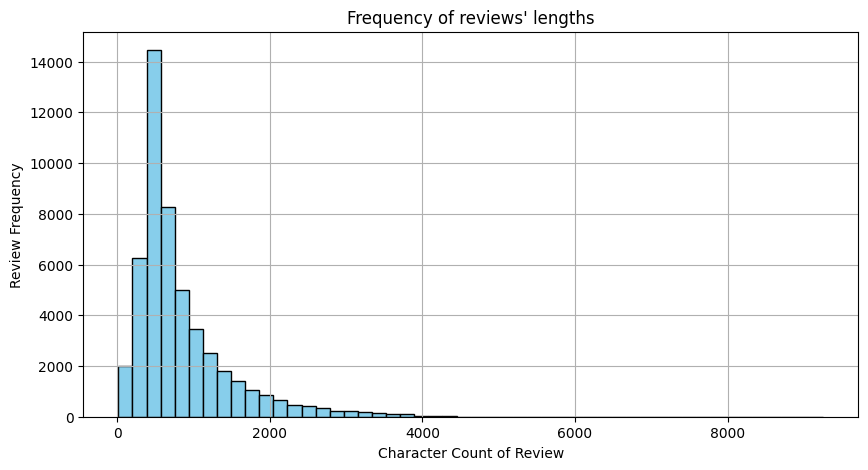

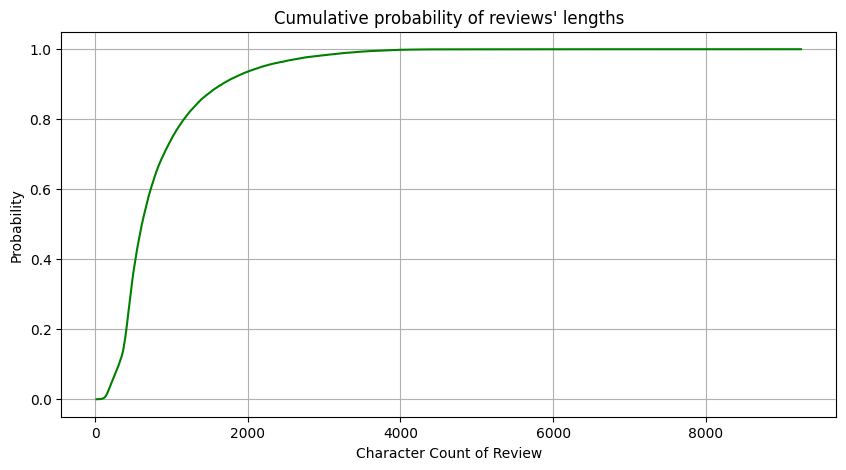

In [25]:
# Calculate character count for each review
character_counts = [len(review) for review in df['review'].dropna()]

# Plot histogram for frequency of reviews vs. character count per review
plt.figure(figsize=(10, 5))
plt.hist(character_counts, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Character Count of Review')
plt.ylabel('Review Frequency')
plt.title("Frequency of reviews' lengths")
plt.grid(True)
plt.show()

# Calculate cumulative probability
total_reviews = len(character_counts)
character_counts_sorted = sorted(character_counts)
cumulative_probability = [sum(1 for count in character_counts_sorted if count <= x) / total_reviews for x in character_counts_sorted]

# Plot cumulative probability
plt.figure(figsize=(10, 5))
plt.plot(character_counts_sorted, cumulative_probability, color='green')
plt.xlabel('Character Count of Review')
plt.ylabel('Probability')
plt.title("Cumulative probability of reviews' lengths")
plt.grid(True)
plt.show()

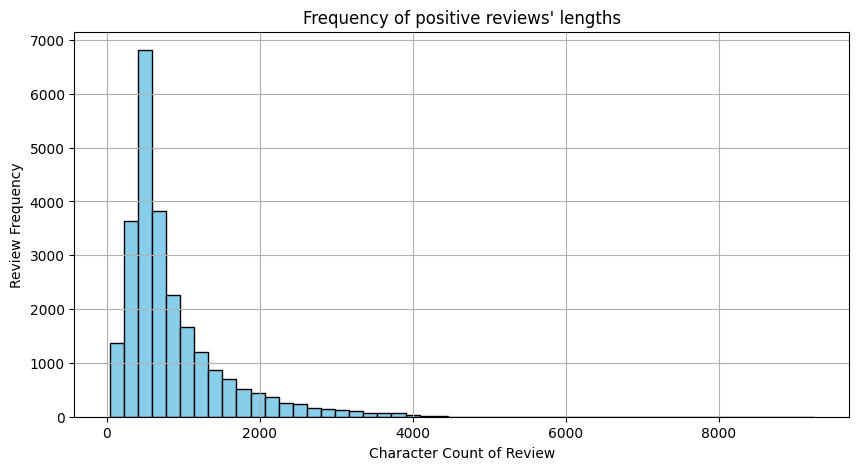

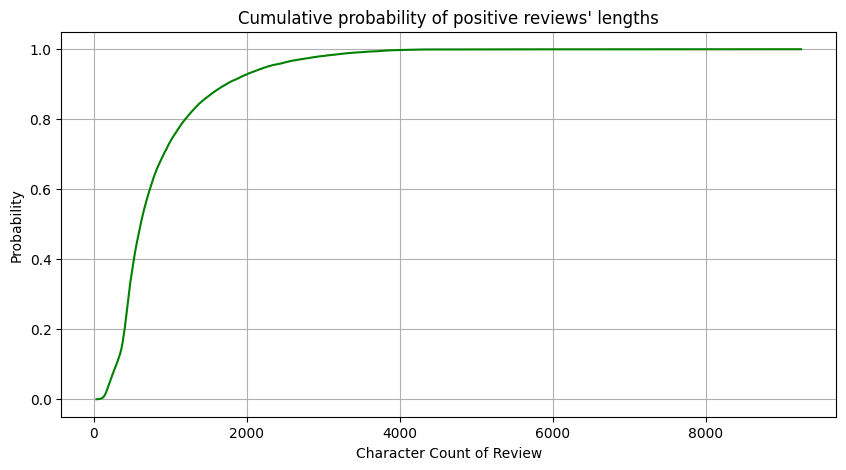

In [10]:
# Filter DataFrame to include only positive reviews
positive_character_counts = [len(review) for review in df[df['sentiment'] == 'positive']['review'].dropna()]

# Plot histogram for frequency of positive reviews vs. character count per review
plt.figure(figsize=(10, 5))
plt.hist(positive_character_counts, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Character Count of Review')
plt.ylabel('Review Frequency')
plt.title("Frequency of positive reviews' lengths")
plt.grid(True)
plt.show()

# Calculate cumulative probability for positive reviews
total_positive_reviews = len(positive_character_counts)
positive_character_counts_sorted = sorted(positive_character_counts)
positive_cumulative_probability = [sum(1 for count in positive_character_counts_sorted if count <= x) / total_positive_reviews for x in positive_character_counts_sorted]

# Plot cumulative probability for positive reviews
plt.figure(figsize=(10, 5))
plt.plot(positive_character_counts_sorted, positive_cumulative_probability, color='green')
plt.xlabel('Character Count of Review')
plt.ylabel('Probability')
plt.title("Cumulative probability of positive reviews' lengths")
plt.grid(True)
plt.show()

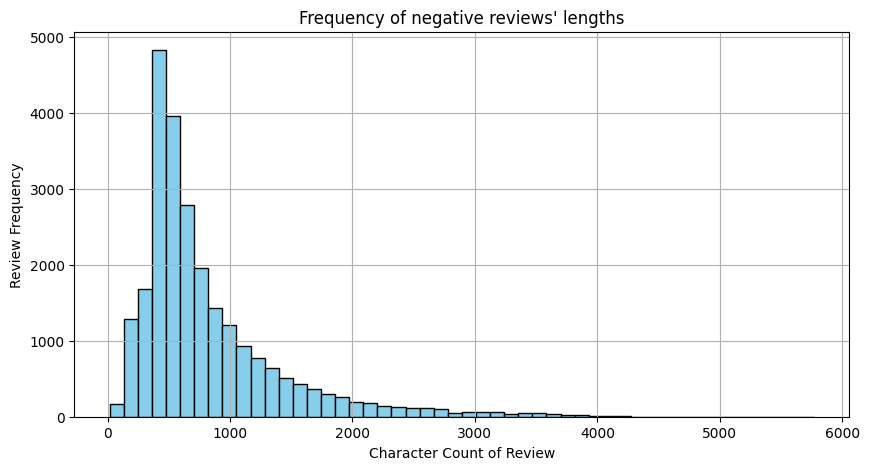

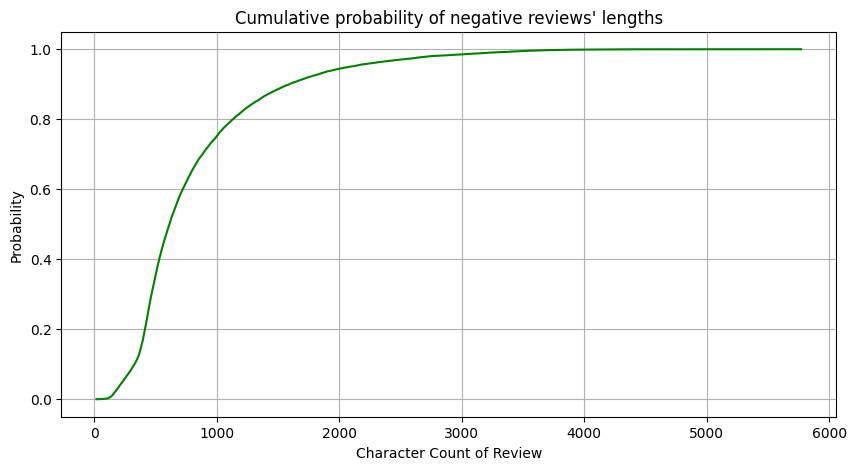

In [11]:
# Filter DataFrame to include only negative reviews
negative_character_counts = [len(review) for review in df[df['sentiment'] == 'negative']['review'].dropna()]

# Plot histogram for frequency of negative reviews vs. character count per review
plt.figure(figsize=(10, 5))
plt.hist(negative_character_counts, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Character Count of Review')
plt.ylabel('Review Frequency')
plt.title("Frequency of negative reviews' lengths")
plt.grid(True)
plt.show()

# Calculate cumulative probability for negative reviews
total_negative_reviews = len(negative_character_counts)
negative_character_counts_sorted = sorted(negative_character_counts)
negative_cumulative_probability = [sum(1 for count in negative_character_counts_sorted if count <= x) / total_negative_reviews for x in negative_character_counts_sorted]

# Plot cumulative probability for negative reviews
plt.figure(figsize=(10, 5))
plt.plot(negative_character_counts_sorted, negative_cumulative_probability, color='green')
plt.xlabel('Character Count of Review')
plt.ylabel('Probability')
plt.title("Cumulative probability of negative reviews' lengths")
plt.grid(True)
plt.show()

## Insights from 2.c) Column and Line Charts for the study of character-count in reviews:

- 80% of all reviews are 1,500 characters or under, and close to all reviews are 2,000 characters or under.
- The same situation's observed when only considering the positive writings: 80% of positive reviews are 1,500 characters or under, and close to all positive reviews are 2,000 characters or under.
- As for the negative writings, the situation changes: 80% of negative reviews are 1,250 characters or under (a lesser number of characters than in the two afore-observed cases, indicating a correlation between the "negative" categorization of a movie and shorter reviews), and close to all negative reviews are 2,000 characters or under.
- On all 3 afore-cited reviews-clusters (all-reviews-considered, positive reviews, negative reviews) there is a growing frequency of reviews on each identified review-length group up until the point of about 300 characters, with that very frequency then progressively dropping.

## <ins>2.d) Column and Line Charts for the study of word-count in positive and negative reviews:</ins>

The Column and Line Charts illustrate the frequency of reviews of all existing lengths, with length being measured in number of words. There are 6 charts in total, grouped in 3 clusters: the first cluster considers all reviews in the dataset, the second cluster considers only positive reviews and the third cluster considers only negative reviews. Inside each of those clusters there are 2 charts: one column chart depicting review-frequency for each length and one line chart showing the cumulative review-frequency for those very same lengths.

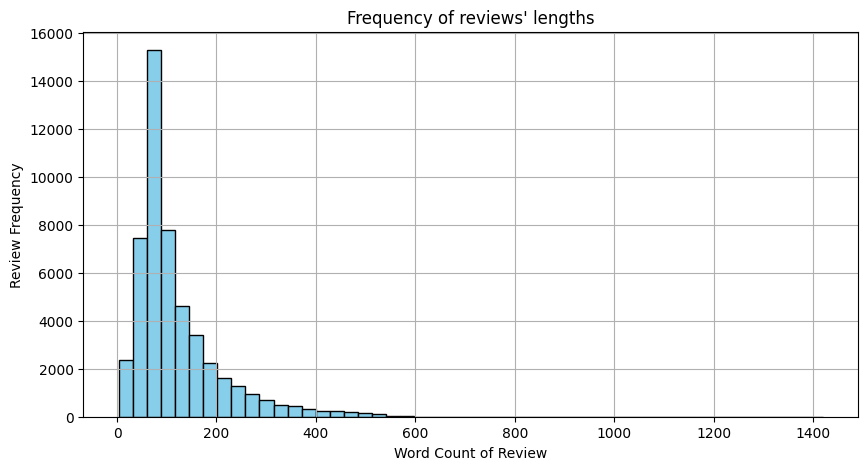

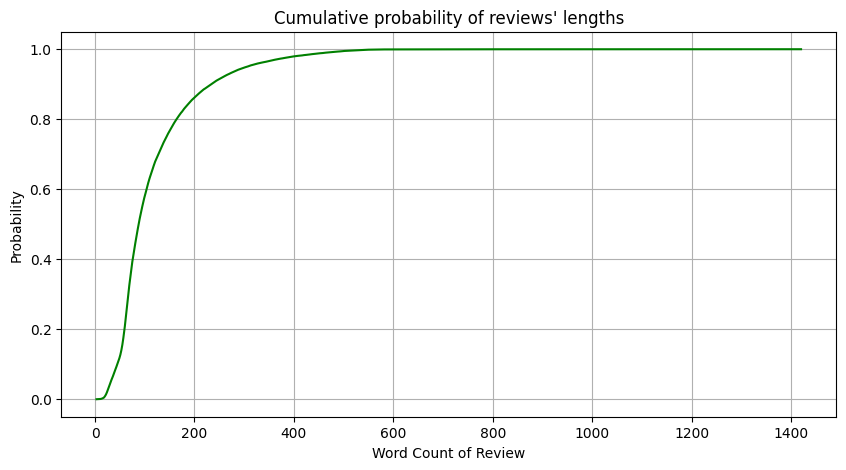

In [16]:
# Calculate word count for each review
word_counts = [len(review.split()) for review in df['review'].dropna()]

# Plot histogram for frequency of reviews vs. word count per review
plt.figure(figsize=(10, 5))
plt.hist(word_counts, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Word Count of Review')
plt.ylabel('Review Frequency')
plt.title("Frequency of reviews' lengths")
plt.grid(True)
plt.show()

# Calculate cumulative probability for word counts
total_reviews = len(word_counts)
word_counts_sorted = sorted(word_counts)
cumulative_probability = [sum(1 for count in word_counts_sorted if count <= x) / total_reviews for x in word_counts_sorted]

# Plot cumulative probability for word counts
plt.figure(figsize=(10, 5))
plt.plot(word_counts_sorted, cumulative_probability, color='green')
plt.xlabel('Word Count of Review')
plt.ylabel('Probability')
plt.title("Cumulative probability of reviews' lengths")
plt.grid(True)
plt.show()

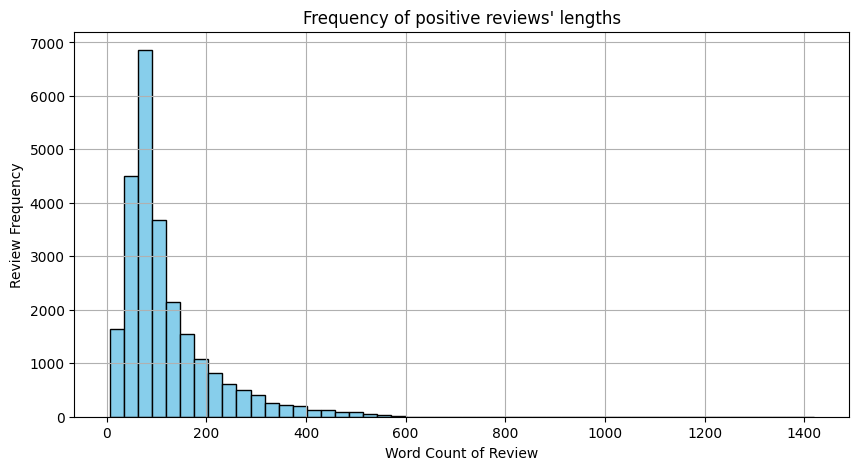

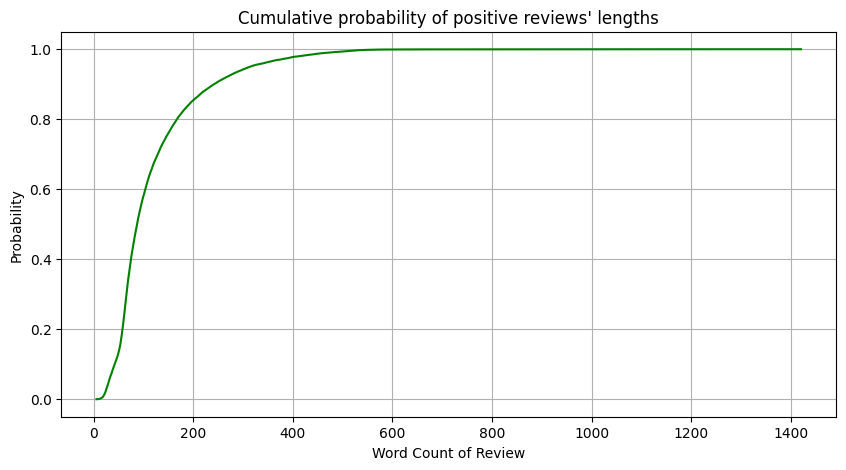

In [17]:
# Filter DataFrame to include only positive reviews
positive_word_counts = [len(review.split()) for review in df[df['sentiment'] == 'positive']['review'].dropna()]

# Plot histogram for frequency of positive reviews vs. word count per review
plt.figure(figsize=(10, 5))
plt.hist(positive_word_counts, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Word Count of Review')
plt.ylabel('Review Frequency')
plt.title("Frequency of positive reviews' lengths")
plt.grid(True)
plt.show()

# Calculate cumulative probability for positive reviews
total_positive_reviews = len(positive_word_counts)
positive_word_counts_sorted = sorted(positive_word_counts)
positive_cumulative_probability = [sum(1 for count in positive_word_counts_sorted if count <= x) / total_positive_reviews for x in positive_word_counts_sorted]

# Plot cumulative probability for positive reviews
plt.figure(figsize=(10, 5))
plt.plot(positive_word_counts_sorted, positive_cumulative_probability, color='green')
plt.xlabel('Word Count of Review')
plt.ylabel('Probability')
plt.title("Cumulative probability of positive reviews' lengths")
plt.grid(True)
plt.show()

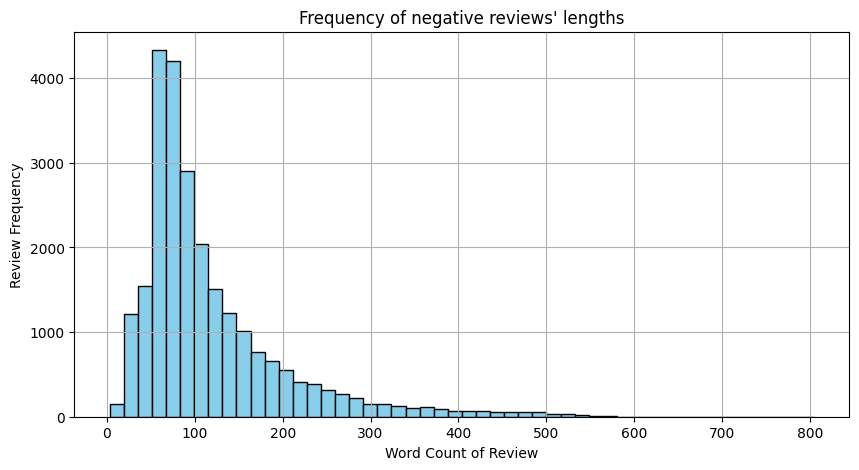

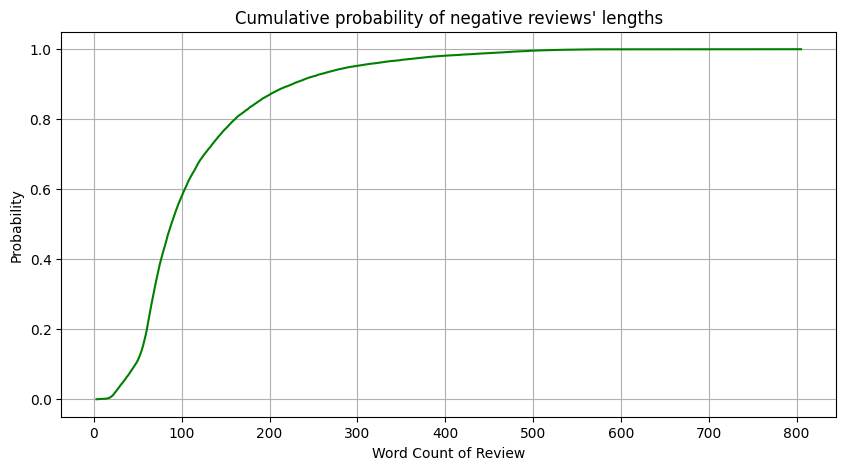

In [18]:
# Filter DataFrame to include only negative reviews
negative_word_counts = [len(review.split()) for review in df[df['sentiment'] == 'negative']['review'].dropna()]

# Plot histogram for frequency of negative reviews vs. word count per review
plt.figure(figsize=(10, 5))
plt.hist(negative_word_counts, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Word Count of Review')
plt.ylabel('Review Frequency')
plt.title("Frequency of negative reviews' lengths")
plt.grid(True)
plt.show()

# Calculate cumulative probability for negative reviews
total_negative_reviews = len(negative_word_counts)
negative_word_counts_sorted = sorted(negative_word_counts)
negative_cumulative_probability = [sum(1 for count in negative_word_counts_sorted if count <= x) / total_negative_reviews for x in negative_word_counts_sorted]

# Plot cumulative probability for negative reviews
plt.figure(figsize=(10, 5))
plt.plot(negative_word_counts_sorted, negative_cumulative_probability, color='green')
plt.xlabel('Word Count of Review')
plt.ylabel('Probability')
plt.title("Cumulative probability of negative reviews' lengths")
plt.grid(True)
plt.show()

## Insights from 2.d) Column and Line Charts for the study of word-count in reviews:

- 80% of all reviews are 200 words or under, and close to all reviews are 400 characters or under.
- The same situation's observed when only considering either the positive or negative writings:
- 80% of positive reviews are 200 characters or under, and close to all positive reviews are 400 characters or under.
- 80% of negative reviews are 200 characters or under, and close to all negative reviews are 400 characters or under.
- On all 3 afore-cited reviews-clusters (all-reviews-considered, positive reviews, negative reviews) there is a growing frequency of reviews on each identified review-length group up until the point of about 90 words for all-reviews-considered and positive reviews and 70 words for negative reviews, with that very frequency then progressively dropping.

# 3. Machine Learning Model classifying reviews as per their sentiment:

## <ins>3.a) Loading of the Pretrained BERT Model:</ins>

This BERT Model has been trained on large text corpora and can be fine-tuned for various tasks including Sentiment Analysis.

In [38]:
from transformers import BertForSequenceClassification

# Load pretrained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # 2 labels for positive/negative sentiment

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## <ins>3.b) Spliting Data into Training and Validation Sets:</ins>

This action trains the model for specific Sentiment Analysis purposes (via the training set) and then evaluates the model's performance (via the validation set).

In [39]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(
    token_ids,  # Use token_ids instead of input_ids
    labels,
    random_state=42,
    test_size=0.1
)
train_masks, validation_masks, _, _ = train_test_split(
    attention_masks,
    attention_masks,  # Split masks based on themselves, not on token_ids
    random_state=42,
    test_size=0.1
)
train_token_type_ids, validation_token_type_ids, _, _ = train_test_split(
    token_type_ids,
    token_type_ids,  # Split token_type_ids based on themselves, not on token_ids
    random_state=42,
    test_size=0.1
)

## <ins>3.c) Creating DataLoaders for Training and Validation Sets:</ins>

This action groups the reviews into batches which then allows for a higher training efficiently of our model than would otherwise be possible.

In [41]:
from torch.utils.data import DataLoader, TensorDataset

# Create DataLoader for training and validation sets
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_dataloader = DataLoader(validation_data, batch_size=32)

## <ins>3.d) Fine-tuning of the BERT Model:</ins>

This action fine-tunes our Model via iterating over batches of data (reviews), calculating the discrepancies between the Model's actual and expected prediction outcomes and adjusting its prediction parameters on the basis of that.

In [43]:
# Check if GPU is available and set device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Fine-tune BERT model
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
epochs = 4

for epoch in range(epochs):
    model.train()
    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}
        
        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

## <ins>3.e) Evaluation and Inference of the BERT Model:</ins>

This action processes reviews through our Model (at this point already trained) and evaluates its inferencial performance by comparing its predictions of each review being "Positive" or "Negative" to their actual known classifications.

In [48]:
# Define the maximum sequence length
max_len = 512

# Inference
def predict_sentiment(review):
    # Tokenize the review
    encoded_dict = tokenizer.encode_plus(
                        review,
                        add_special_tokens=True,
                        max_length=max_len,
                        padding='max_length',
                        truncation=True,
                        return_attention_mask=True,
                        return_tensors='pt'
                   )
    
    # Move inputs to the appropriate device
    input_ids = encoded_dict['input_ids'].to(device)
    attention_mask = encoded_dict['attention_mask'].to(device)
    
    # Perform inference
    with torch.no_grad():
        output = model(input_ids, attention_mask)
    
    # Calculate predicted label
    logits = output.logits
    predicted_label = torch.argmax(logits, dim=1).item()
    
    # Convert predictions and true_labels to PyTorch tensors
    predictions_tensor = torch.tensor([predicted_label]).to(device)
    true_labels_tensor = torch.tensor([1 if predicted_label == 1 else 0]).to(device)  # Assuming binary classification
    
    # Calculate accuracy
    accuracy = (predictions_tensor == true_labels_tensor).float().mean()
    print("Validation Accuracy:", accuracy.item())
    
    return predicted_label

# Example inference
review = "I really enjoyed this movie!"
predicted_sentiment = predict_sentiment(review)
print("Predicted Sentiment:", "Positive" if predicted_sentiment == 1 else "Negative")

Validation Accuracy: 1.0
Predicted Sentiment: Positive


## Final conclusion from 3. Machine Learning Model classifying reviews as per their sentiment:

The model demonstrates exceptional performance in classifying reviews, correctly predicting the sentiment of 100% of those it's seen. 